In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("student_engagement_data_10000.csv")


In [8]:
df.isnull().sum()

Student ID                  0
Session ID                  0
Date                        0
EEG Data (PSD Features)     0
Engagement Level            0
Attention Level             0
Internet Connectivity       0
Adaptivity Level            0
Learning Mode Prediction    0
Performance Metrics         0
dtype: int64

In [9]:
df.columns.tolist()

['Student ID',
 'Session ID',
 'Date',
 'EEG Data (PSD Features)',
 'Engagement Level',
 'Attention Level',
 'Internet Connectivity',
 'Adaptivity Level',
 'Learning Mode Prediction',
 'Performance Metrics']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student ID                10000 non-null  int64 
 1   Session ID                10000 non-null  int64 
 2   Date                      10000 non-null  object
 3   EEG Data (PSD Features)   10000 non-null  object
 4   Engagement Level          10000 non-null  object
 5   Attention Level           10000 non-null  object
 6   Internet Connectivity     10000 non-null  object
 7   Adaptivity Level          10000 non-null  object
 8   Learning Mode Prediction  10000 non-null  object
 9   Performance Metrics       10000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 781.4+ KB


In [7]:
df.head()

,Student ID,Session ID,Date,EEG Data (PSD Features),Engagement Level,Attention Level,Internet Connectivity,Adaptivity Level,Learning Mode Prediction,Performance Metrics
0,1,183,2025-01-20,"[0.02336871035675725, 0.14892576656473, 0.4845...",High,High,High (Mobile/Wi-Fi),Moderate,Visual Learner,84
1,2,121,2025-01-20,"[0.3587673311624021, 0.8537981137219391, 0.420...",Low,High,Moderate (Wi-Fi),High,Auditory Learner,82
2,3,169,2025-01-10,"[0.7420744093003028, 0.9072353407615483, 0.122...",Moderate,High,Low (Mobile),Low,Auditory Learner,83
3,4,132,2025-01-20,"[0.5596059164442914, 0.4645215049524961, 0.062...",High,Moderate,Low (Mobile),Moderate,Visual Learner,66
4,5,190,2025-01-18,"[0.15041646487754368, 0.7331633184349893, 0.86...",High,High,High (Mobile/Wi-Fi),Moderate,Auditory Learner,93


In [8]:
df.describe()

,Student ID,Session ID,Performance Metrics
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,149.762700,74.674300
std,2886.89568,28.783232,14.383404
min,1.00000,100.000000,50.000000
25%,2500.75000,125.000000,62.000000
50%,5000.50000,150.000000,75.000000
75%,7500.25000,174.000000,87.000000
max,10000.00000,199.000000,99.000000


In [12]:
df['Student ID'].value_counts()  

Student ID
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64

In [13]:
df['Learning Mode Prediction'].value_counts() 

Learning Mode Prediction
Kinesthetic Learner    3374
Auditory Learner       3326
Visual Learner         3300
Name: count, dtype: int64

In [ ]:
df['Learning Mode Prediction'].value_counts() 

In [10]:
import ast
import numpy as np
df['EEG Data (PSD Features)'] = df['EEG Data (PSD Features)'].apply(ast.literal_eval)

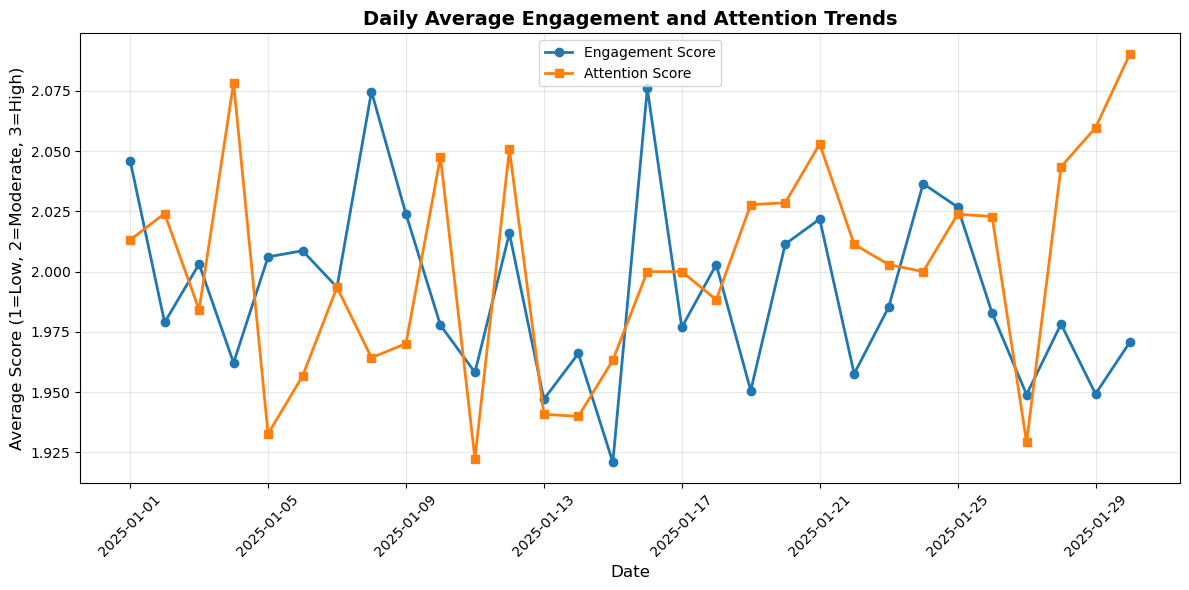

Daily Average Engagement and Attention Scores:
         Date  Engagement_Score  Attention_Score
0  2025-01-01              2.05             2.01
1  2025-01-02              1.98             2.02
2  2025-01-03              2.00             1.98
3  2025-01-04              1.96             2.08
4  2025-01-05              2.01             1.93
5  2025-01-06              2.01             1.96
6  2025-01-07              1.99             1.99
7  2025-01-08              2.07             1.96
8  2025-01-09              2.02             1.97
9  2025-01-10              1.98             2.05
10 2025-01-11              1.96             1.92
11 2025-01-12              2.02             2.05
12 2025-01-13              1.95             1.94
13 2025-01-14              1.97             1.94
14 2025-01-15              1.92             1.96
15 2025-01-16              2.08             2.00
16 2025-01-17              1.98             2.00
17 2025-01-18              2.00             1.99
18 2025-01-19         

In [13]:
import matplotlib.pyplot as plt
engagement_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
attention_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}

df['Engagement_Score'] = df['Engagement Level'].map(engagement_mapping)
df['Attention_Score'] = df['Attention Level'].map(attention_mapping)

daily_avg = df.groupby('Date').agg({
    'Engagement_Score': 'mean',
    'Attention_Score': 'mean'
}).reset_index()

daily_avg['Date'] = pd.to_datetime(daily_avg['Date'])
daily_avg = daily_avg.sort_values('Date')

plt.figure(figsize=(12, 6))
plt.plot(daily_avg['Date'], daily_avg['Engagement_Score'], marker='o', label='Engagement Score', linewidth=2)
plt.plot(daily_avg['Date'], daily_avg['Attention_Score'], marker='s', label='Attention Score', linewidth=2)

plt.title('Daily Average Engagement and Attention Trends', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Score (1=Low, 2=Moderate, 3=High)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Daily Average Engagement and Attention Scores:")
print(daily_avg.round(2))

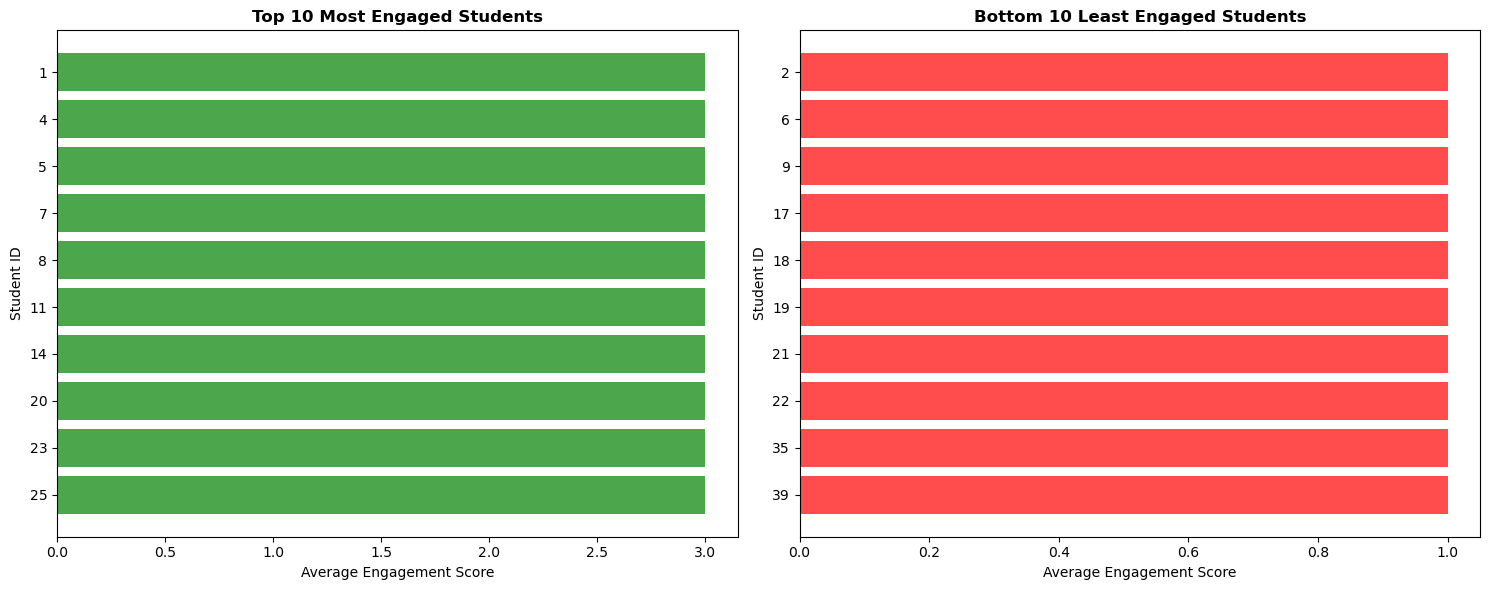


Performance Comparison:
Top 10 Engaged Students Average Performance: 67.4
Bottom 10 Engaged Students Average Performance: 77.6


In [14]:
student_engagement = df.groupby('Student ID').agg({
    'Engagement_Score': 'mean',
    'Performance Metrics': 'mean'
}).reset_index()

top_engaged = student_engagement.nlargest(10, 'Engagement_Score')
bottom_engaged = student_engagement.nsmallest(10, 'Engagement_Score')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.barh(top_engaged['Student ID'].astype(str), top_engaged['Engagement_Score'], color='green', alpha=0.7)
ax1.set_title('Top 10 Most Engaged Students', fontsize=12, fontweight='bold')
ax1.set_xlabel('Average Engagement Score')
ax1.set_ylabel('Student ID')
ax1.invert_yaxis()  

ax2.barh(bottom_engaged['Student ID'].astype(str), bottom_engaged['Engagement_Score'], color='red', alpha=0.7)
ax2.set_title('Bottom 10 Least Engaged Students', fontsize=12, fontweight='bold')
ax2.set_xlabel('Average Engagement Score')
ax2.set_ylabel('Student ID')
ax2.invert_yaxis()  

plt.tight_layout()
plt.show()

print("\nPerformance Comparison:")
print(f"Top 10 Engaged Students Average Performance: {top_engaged['Performance Metrics'].mean():.1f}")
print(f"Bottom 10 Engaged Students Average Performance: {bottom_engaged['Performance Metrics'].mean():.1f}")

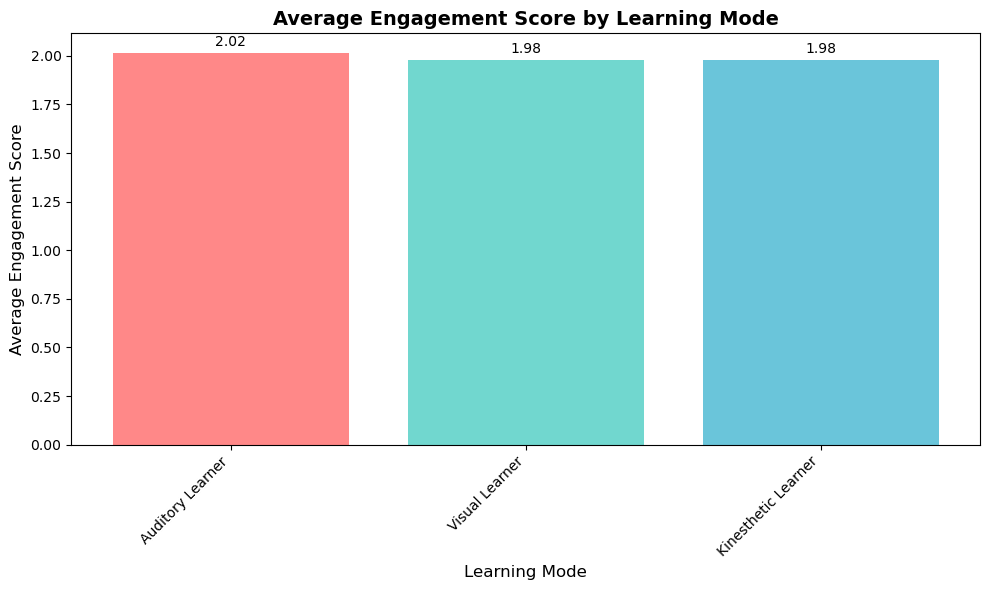

Engagement and Performance by Learning Mode:
  Learning Mode Prediction  Engagement_Score  Performance Metrics  \
0         Auditory Learner              2.02                74.50   
2           Visual Learner              1.98                74.97   
1      Kinesthetic Learner              1.98                74.55   

   Student Count  
0           3326  
2           3300  
1           3374  


In [15]:
learning_mode_engagement = df.groupby('Learning Mode Prediction').agg({
    'Engagement_Score': 'mean',
    'Performance Metrics': 'mean',
    'Student ID': 'count'  
}).rename(columns={'Student ID': 'Student Count'}).reset_index()

learning_mode_engagement = learning_mode_engagement.sort_values('Engagement_Score', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(learning_mode_engagement['Learning Mode Prediction'], 
               learning_mode_engagement['Engagement_Score'],
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)

plt.title('Average Engagement Score by Learning Mode', fontsize=14, fontweight='bold')
plt.xlabel('Learning Mode', fontsize=12)
plt.ylabel('Average Engagement Score', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display the results
print("Engagement and Performance by Learning Mode:")
print(learning_mode_engagement.round(2))

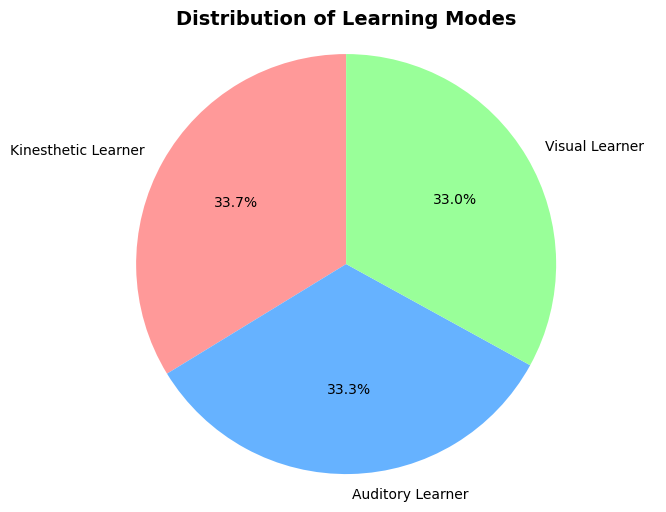


Total number of students: 10000
Date range: 2025-01-01 to 2025-01-30


In [16]:
learning_mode_counts = df['Learning Mode Prediction'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(learning_mode_counts.values, labels=learning_mode_counts.index, autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF', '#99FF99'], startangle=90)
plt.title('Distribution of Learning Modes', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

print(f"\nTotal number of students: {df['Student ID'].nunique()}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")